In [255]:
import pandas as pd
df_inter = pd.read_csv('users_interactions.csv')
df_inter.sort_values(by=['contentId', 'personId', 'timestamp'], inplace=True) # This sorting will matter later when we clean the data
df_inter.head()


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
15196,1465871309,LIKE,-9222795471790223670,-6944500707172804068,-5340720491558102327,NaN,NaN,NaN
15184,1465870443,VIEW,-9222795471790223670,-5868110530814399805,1607781139334257479,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,13,JP
15194,1465870444,VIEW,-9222795471790223670,-5868110530814399805,1607781139334257479,NaN,NaN,NaN
15197,1465871011,FOLLOW,-9222795471790223670,-5868110530814399805,1607781139334257479,NaN,NaN,NaN
15198,1465871038,VIEW,-9222795471790223670,-5868110530814399805,1607781139334257479,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,13,JP


In [256]:
df_articles = pd.read_csv('shared_articles.csv', index_col='contentId')
df_articles.head()

,timestamp,eventType,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
contentId,,,,,,,,,,,,
-6451309518266745024,1459192779,CONTENT REMOVED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
-4110354420726924665,1459193988,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
-7292285110016212249,1459194146,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
-6151852268067518688,1459194474,CONTENT SHARED,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
2448026894306402386,1459194497,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [257]:
# Map event types to numeric strengths
event_strength = {
    'VIEW': 1,
    'LIKE': 2,
    'FOLLOW': 3,
    'BOOKMARK': 4,
    'COMMENT CREATED': 5
}

df_inter['eventStrength'] = df_inter['eventType'].map(event_strength)

df_inter.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,eventStrength
15196,1465871309,LIKE,-9222795471790223670,-6944500707172804068,-5340720491558102327,NaN,NaN,NaN,2
15184,1465870443,VIEW,-9222795471790223670,-5868110530814399805,1607781139334257479,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,13,JP,1
15194,1465870444,VIEW,-9222795471790223670,-5868110530814399805,1607781139334257479,NaN,NaN,NaN,1
15197,1465871011,FOLLOW,-9222795471790223670,-5868110530814399805,1607781139334257479,NaN,NaN,NaN,3
15198,1465871038,VIEW,-9222795471790223670,-5868110530814399805,1607781139334257479,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,13,JP,1


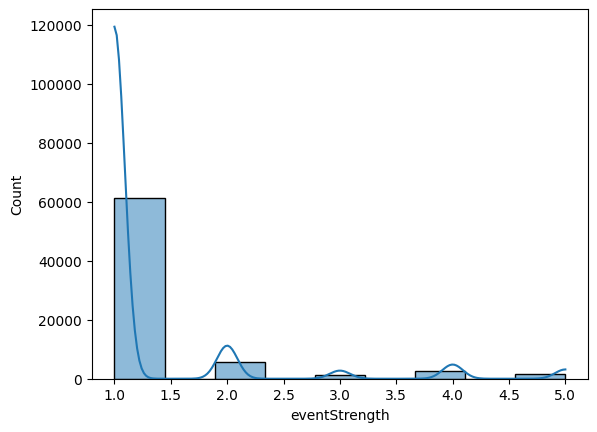

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_inter, x='eventStrength', kde=True, bins=9);

In [259]:
n_ratings = len(df_inter)
n_articles = len(df_inter['contentId'].unique())
n_users = len(df_inter['personId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_articles}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_articles, 2)}")

Number of ratings: 72312
Number of unique movieId's: 2987
Number of unique users: 1895
Average ratings per user: 38.16
Average ratings per movie: 24.21


In [260]:
df_inter['contentId'].value_counts()

contentId
-4029704725707465084    433
-133139342397538859     315
 8657408509986329668    294
-6783772548752091658    294
-6843047699859121724    281
                       ... 
-8388400806941996172      1
-8418620743404378592      1
-9172673334835262304      1
-9040419159428373932      1
-8445686000003509032      1
Name: count, Length: 2987, dtype: int64

In [261]:
print('Min:\t\t', df_inter['contentId'].value_counts().min())
print('Quartile 1:\t', df_inter['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_inter['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_inter['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_inter['contentId'].value_counts().max())

Min:		 1
Quartile 1:	 6.0
Median:		 14.0
Quartile 3:	 30.0
Max:		 433


In [262]:
# Make a list of movieIds that are not in the 3rd quartile

# Store the count of ratings for each movie
value_counts = df_inter['contentId'].value_counts()

# Make a list of those with more than 9 ratings
keep_list = value_counts[value_counts >= 30]
print(len(keep_list), 'movies with 30 or more ratings\n')
keep_list

766 movies with 30 or more ratings



contentId
-4029704725707465084    433
-133139342397538859     315
 8657408509986329668    294
-6783772548752091658    294
-6843047699859121724    281
                       ... 
 962287586799267519      30
-3136683414587095274     30
-7331393944609614247     30
 4744297321841608877     30
-8800029253812071912     30
Name: count, Length: 766, dtype: int64

In [263]:
# Filter the original df_triple DataFrame down to only those movies in that list

# We can use the .isin() method to check if the movieId (which is the index of the keep_list) is in our drop_list
df_inter = df_inter.loc[df_inter['contentId'].isin(keep_list.index)]
print(df_inter.shape)
print("Reviews per article:\t", df_inter.shape[0]/len(keep_list))

(47837, 9)
Reviews per article:	 62.45039164490861


In [264]:
# Check for duplicate rows but based only on userId and movieId
print(f"Duplicate ratings: {df_inter.duplicated(subset=['personId', 'contentId']).sum()}")

Duplicate ratings: 22824


In [265]:
# This is how we would clean the data if there were duplicates:

print(f'Total rows before dropping duplicates: {df_inter.shape[0]}')

# keep='last' if you want to keep the last record
# keep=False if you want to drop all duplicates
df_inter.drop_duplicates(subset=['personId', 'contentId'], keep='first', inplace=True)

# These print statements are just a 'sanity check' to make sure we truly didn't have duplicates
print(f'Total rows after dropping duplicates: {df_inter.shape[0]}')

Total rows before dropping duplicates: 47837
Total rows after dropping duplicates: 25013


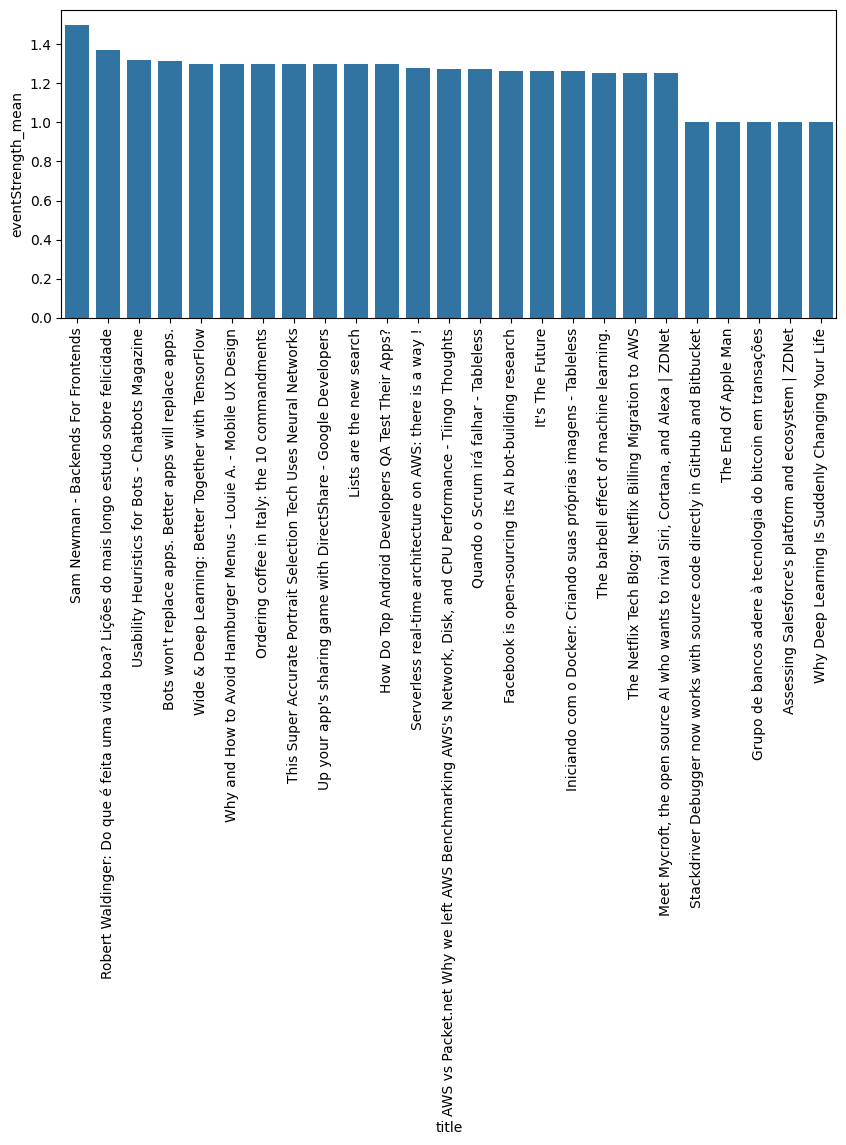

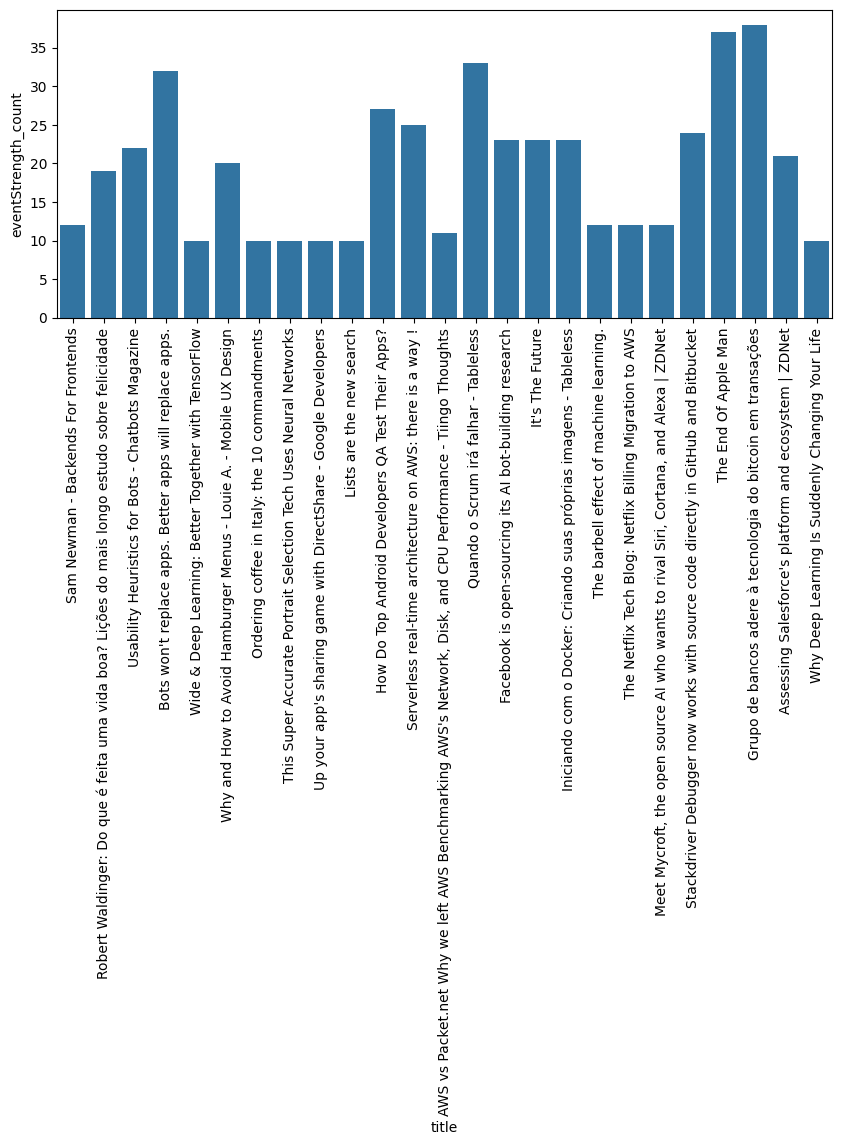

In [266]:
# Visualize the average rating for each movie

# Group the rows into individual titles and calculate the mean rating for each row
article_stats = df_inter.groupby(by=['contentId'])[['eventStrength']].agg(['count', 'mean'])
article_stats.columns = ['eventStrength_count', 'eventStrength_mean'] # Rename the columns to simplify the index

# Join with df_movies to get the titles
article_stats = article_stats.join(df_articles[['title']])

# Sort the ratings
article_stats = article_stats.sort_values(by=['eventStrength_mean'], ascending=False)

# Create a smaller dataset of the top n and bottom n rated movies
df_reduced = pd.concat([article_stats.head(20), article_stats.tail(5)])

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='eventStrength_mean')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='eventStrength_count')
plt.xticks(rotation=90)
plt.show()

In [267]:
import numpy as np
from scipy.sparse import csr_matrix

# This is just FYI so that you can understand why we have to to what we do:
print(f'Min and max userIds: {df_inter["personId"].min()} and {df_inter["personId"].max()}')
print(f'Min and max movieIds: {df_inter["contentId"].min()} and {df_inter["contentId"].max()}')

U = df_inter['personId'].nunique()   # Number of users for the matrix
I = df_inter['contentId'].nunique()  # Number of items for the matrix

# Map user and item IDs to matrix indices
user_mapper = dict(zip(np.unique(df_inter['personId']), list(range(U))))
item_mapper = dict(zip(np.unique(df_inter['contentId']), list(range(I))))

# Map matrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_inter['personId'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_inter['contentId'])))

# Create a list of index values for the csr_matrix for users and items
user_index = [user_mapper[i] for i in df_inter['personId']]
item_index = [item_mapper[i] for i in df_inter['contentId']]

# Build the final matrix which will look like: (movieId, userId) rating
X = csr_matrix((df_inter['eventStrength'], (item_index, user_index)), shape=(I, U))

# Print each item out to see how they all work together.
# Each object is used to create the next object.
# We don't have to print these out; this is just to help you understand.
print(f'Number of users: {U}')
print(f'Number of items: {I}')
print(f'user_mapper:\t {len(user_mapper.keys())}   keys:values {user_mapper}')
print(f'item_mapper:\t {len(item_mapper.keys())}  keys:values {item_mapper}')
print(f'user_index:\t {len(user_index)} values\t   {user_index}')
print(f'item_index:\t {len(item_index)} values\t   {item_index}')
print(f'user_inv_mapper: {len(user_inv_mapper.keys())}   keys:values {user_inv_mapper}')
print(f'item_inv_mapper: {len(item_inv_mapper.keys())}  keys:values {item_inv_mapper}')
print(f'X: {X}')

Min and max userIds: -9223121837663643404 and 9210530975708218054
Min and max movieIds: -9192549002213406534 and 9220445660318725468
Number of users: 1804
Number of items: 766
user_mapper:	 1804   keys:values {np.int64(-9223121837663643404): 0, np.int64(-9212075797126931087): 1, np.int64(-9207251133131336884): 2, np.int64(-9199575329909162940): 3, np.int64(-9196668942822132778): 4, np.int64(-9188188261933657343): 5, np.int64(-9172914609055320039): 6, np.int64(-9156344805277471150): 7, np.int64(-9150583489352258206): 8, np.int64(-9120685872592674274): 9, np.int64(-9109785559521267180): 10, np.int64(-9099478998637725255): 11, np.int64(-9083704948999852989): 12, np.int64(-9063420486253202900): 13, np.int64(-9060214117327732109): 14, np.int64(-9048557723087354030): 15, np.int64(-9047547311469006438): 16, np.int64(-9016528795238256703): 17, np.int64(-9012030317377670760): 18, np.int64(-9009798162809551896): 19, np.int64(-9001583565812478106): 20, np.int64(-8994220765455693336): 21, np.int64

In [268]:
# Let's make all four objects in a function
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and item IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (itemId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [269]:
# Call the function and store the objects needed to calculate similarity and make recommendations
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_inter, 'personId', 'contentId', 'eventStrength')

print(X) # (movieId, userId)   rating
print(user_mapper)
print(user_inv_mapper)
print(item_mapper)
print(item_inv_mapper)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 25013 stored elements and shape (766, 1804)>
  Coords	Values
  (0, 17)	1
  (0, 20)	1
  (0, 29)	1
  (0, 33)	1
  (0, 66)	1
  (0, 98)	1
  (0, 112)	1
  (0, 122)	1
  (0, 191)	1
  (0, 271)	1
  (0, 384)	1
  (0, 497)	1
  (0, 537)	1
  (0, 601)	1
  (0, 621)	1
  (0, 641)	1
  (0, 713)	1
  (0, 751)	1
  (0, 762)	1
  (0, 773)	1
  (0, 791)	1
  (0, 920)	1
  (0, 948)	2
  (0, 952)	1
  (0, 968)	1
  :	:
  (765, 227)	1
  (765, 290)	1
  (765, 293)	1
  (765, 384)	1
  (765, 751)	1
  (765, 762)	1
  (765, 863)	1
  (765, 928)	1
  (765, 1026)	1
  (765, 1082)	1
  (765, 1161)	1
  (765, 1186)	1
  (765, 1201)	1
  (765, 1253)	1
  (765, 1268)	1
  (765, 1277)	1
  (765, 1315)	1
  (765, 1336)	1
  (765, 1337)	1
  (765, 1452)	1
  (765, 1518)	1
  (765, 1646)	1
  (765, 1748)	1
  (765, 1784)	1
  (765, 1797)	1
{np.int64(-9223121837663643404): 0, np.int64(-9212075797126931087): 1, np.int64(-9207251133131336884): 2, np.int64(-9199575329909162940): 3, np.int64(-91966689428

In [270]:
# How sparse is this matrix?
sparsity = round(1.0 - len(df_inter) / float(len(user_mapper) * len(item_mapper)), 3)
print('The sparsity level of this matrix is {}%'.format(sparsity * 100))

The sparsity level of this matrix is 98.2%


In [271]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [272]:
# Use any movie id here to get recommendations
content_id = df_inter['contentId'].sample(1).values[0]


rec_ids, rec_distances = recommend(content_id, X, item_mapper, item_inv_mapper, k=10)

print(f"If you like {df_articles.loc[content_id, 'title']}, you may also enjoy:\n")

df_recommendations = pd.DataFrame(columns=['contentId', 'Recommendation', 'Strength (lower is better)'])
df_recommendations.set_index('contentId', inplace=True)

for i in rec_ids:
  df_recommendations.loc[i] = [df_articles.loc[i, 'title'], rec_distances[rec_ids.index(i)]]

df_recommendations

List of recommended item indeces:
[675  53 745 663 199 324 427 157 380 515 161]

List of recommended item IDs:
[np.int64(-8043889175123948305), np.int64(8749720044741011597), np.int64(6829640091575814990), np.int64(-4487024160266973763), np.int64(-1425776303341065806), np.int64(1031060816592502094), np.int64(-5571606607344218289), np.int64(-5924996404988010), np.int64(3142843830268077617), np.int64(-5488842573681626972)]

List of recommended item similarity to selected item:
[0.76331768 0.77889168 0.78241554 0.78918149 0.80218586 0.81258216
 0.81375192 0.81813484 0.82111456 0.82308504]

If you like Workshop de Design Thinking - Unicamp, you may also enjoy:



,Recommendation,Strength (lower is better)
contentId,,
-8043889175123948305,Dicas avançadas de ruby (capybara/cucumber),0.763318
8749720044741011597,Como Usar o Git e o GitHub,0.778892
6829640091575814990,Branding é problema seu. E meu.,0.782416
-4487024160266973763,Visa inaugura Co-Creation Center em São Paulo,0.789181
-1425776303341065806,Natura inova e cria bot para auxiliar consumid...,0.802186
1031060816592502094,Evernote anuncia integração com Google Drive |...,0.812582
-5571606607344218289,Agile: Falta competência nos testes,0.813752
-5924996404988010,"Google lança Science Journal, aplicativo de ci...",0.818135
3142843830268077617,Building Flipkart Lite: A Progressive Web App,0.821115


In [273]:
# Get a list of recommendations based on a single randomly selected movie from all of their top rated movies

user_id = df_inter['personId'].sample(1).values[0]   # Select a user
k = 20          # Select the number of recommendations to give them; movies they've seen will be removed from this total

# Filter the data by only those movies rated by this user
df_user_strength = df_inter[df_inter['personId']==user_id]

# Find the movies with the max ratings for this user
max_eventStrength = df_user_strength['eventStrength'].max()
df_favorites = df_user_strength[df_user_strength['eventStrength'] == max_eventStrength]['contentId']

# Randomly select one of their top rated movies
content_id = df_favorites.sample(n=1).iloc[0]

# Get a list of recommendations based on their top rated movie
rec_ids, rec_distances = recommend(content_id, X, item_mapper=item_mapper, item_inv_mapper=item_inv_mapper,
                                   k=k, messages=False)

print(f"Since you liked {df_articles.loc[content_id, 'title']}, consider these:\n")
for i in rec_ids:
  if not i in list(df_user_strength['contentId']): # Make sure we don't recommend movies they have already seen
    print(f"\t{df_articles.loc[i, 'title']}")

Since you liked We are on the verge of a consumer M&A avalanche, consider these:

	Facebook Workplace officially launches on the web and iOS, set to compete head-on with Slack
	Secret's founder returns with Bold, a Medium for enterprise
	Top 10 Intranet Trends of 2016
	Wide & Deep Learning: Better Together with TensorFlow
	The return of the machinery question
	Google acquires Synergyse, an interactive training service for Google Apps
	Machine Learning Is At The Very Peak Of Its Hype Cycle - ARC


In [274]:
# Create a function to fit the cluster model; allow the caller to specify the matrix, k, and metric
def fit_cluster(X, k, metric='cosine'):
  from sklearn.neighbors import NearestNeighbors

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
  return knn

# These functions for deployment are the same ones we created and use earlier
def dump_pickle(model, file_name):
  import pickle
  pickle.dump(model, open(file_name, "wb"))

def load_pickle(file_name):
  import pickle
  model = pickle.load(open(file_name, "rb"))
  return model

In [275]:
def recommend_light(itemId, knn, item_mapper, item_inv_mapper, messages=True):
  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [276]:
# Train and store the model
knn = fit_cluster(X, k=10)
import pickle

# Save the model as a .sav file
with open('knn_model.sav', 'wb') as f:
    pickle.dump(knn, f)

In [277]:
# Load and make predictions against the model
with open('knn_model.sav', 'rb') as f:
    knn = pickle.load(f)

# Use any movie id here to get recommendations
content_id = -7518373517401484139
rec_ids, rec_distances = recommend_light(content_id, knn, item_mapper, item_inv_mapper, messages=False)

print(f"If you like {df_articles.loc[content_id, 'title']}, you may also enjoy:\n")

df_recommendations = pd.DataFrame(columns=['contentId', 'Recommendation', 'Strength (lower is better)'])
df_recommendations.set_index('contentId', inplace=True)

for i in rec_ids:
  df_recommendations.loc[i] = [df_articles.loc[i, 'title'], rec_distances[rec_ids.index(i)]]

df_recommendations

If you like My favorite people and resources to learn Android programming from, you may also enjoy:



,Recommendation,Strength (lower is better)
contentId,,
8886002764685330098,Exploring Java's Hidden Costs,0.608069
-3944300307678659798,DBA BRASIL no INTEROPMIX 2016,0.619000
-6654470039478316910,Advanced Android Espresso,0.650873
4508362112182399467,Facebook's Artificial Intelligence Research la...,0.663989
-4084394822880420062,Android Studio 2.2,0.678931
-5044204125574973395,Samsung lança dispositivo para deixar carro co...,0.680390
4164212115654350513,VMware Cloud™ on AWS - A Closer Look - frankde...,0.682655
-7623502978685822577,"Don't Start Big, Start a Little Snowball",0.682655
1992928170409443117,Google vai reduzir em 50% consumo de memória d...,0.684951


In [278]:
# How much time does this save us?
%timeit recommend_light(content_id, knn, item_mapper, item_inv_mapper, messages=False)
%timeit recommend(content_id, X, item_mapper, item_inv_mapper, k=10, messages=False)

921 μs ± 53.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.09 ms ± 62.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
